<a href="https://colab.research.google.com/github/AnkurAmanDash122010320012/TSF_GRIP-Data-Science-Tasks/blob/main/Task_2_Prediction_using_Unsupervised_ML_(Level_Beginner).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***THE SPARKS FOUNDATION***

## **Data Science and Business Analytics Intern**

#### **TASK 2:- Prediction using Unsupervised ML**

In this unsupervised machine learning task, my objective is to apply K-means clustering to the given 'Iris' dataset and determine the optimum number of clusters.

## ***K-Means Clustering***

K-means clustering is a popular algorithm used for grouping similar data points into clusters. It works by iteratively assigning data points to the nearest centroid and updating the centroids based on the assigned points. The algorithm aims to minimize the within-cluster sum of squares (WCSS), which measures the compactness of each cluster.

# ***AUTHOR:- Ankur Aman Dash***

> Copyright., 2023

---





### **Step 1: Setup-Importing necessary libraries**

Let's start by importing the necessary libraries for our analysis. We'll use the pandas library to load and manipulate the dataset, the scikit-learn library for clustering analysis, and the matplotlib and seaborn libraries for data visualization.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data, columns = iris.feature_names)
print(iris_data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


### **Step 2: Identifying the most suitable number of clusters through the implementation of the elbow method**

Next, after loading the Iris dataset we'll perform the elbow method to determine the optimum number of clusters. The elbow method helps us identify the point of inflection where the rate of decrease in within-cluster sum of squares (WCSS) starts to level off.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

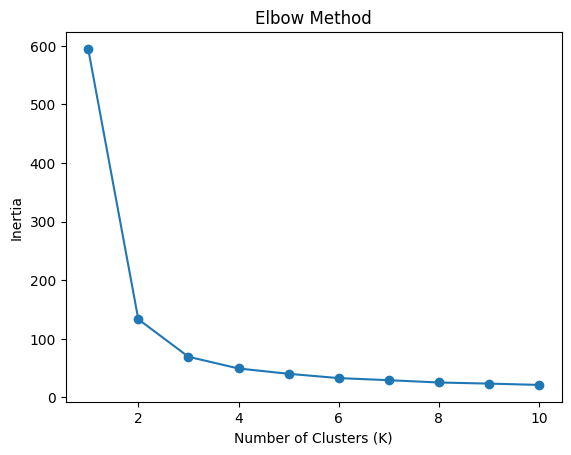

In [55]:
# Extract the features (all columns except the last one)
X = iris_data.iloc[:, :-1].values

# Calculate the inertia for different values of K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the inertia values
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

**Based on our analysis, we select '3' as the optimal number of clusters.**


### **Step 3: Constructing the KMeans classifier**

Based on the elbow plot, we can determine that the optimum number of clusters is 3. We'll create a KMeans classifier with K=3 and fit it to our data.

In [56]:
# Create the KMeans classifier
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the classifier to the data
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3, random_state=42)

### **Step 4: Visualizing the Clusters**

Now, we can plot the clusters obtained from the KMeans algorithm. We'll assign different colors to each cluster and plot the data points accordingly.

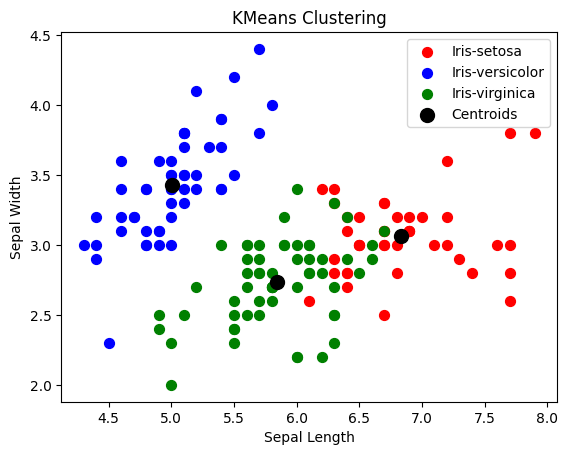

In [57]:
# Getting the cluster labels
labels = kmeans.labels_

# Getting the cluster centers
centers = kmeans.cluster_centers_

# Plotting the clusters
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s=50, c='red', label='Iris-setosa')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s=50, c='blue', label='Iris-versicolor')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s=50, c='green', label='Iris-virginica')

# Plotting the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], s=100, c='black', label='Centroids')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

For 6D plotting, we need to identify the column name. To do so, we can print the column names of the given DataFrame using "iris_data.columns".

In [58]:
iris_data.columns



Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [67]:
import plotly.express as px

# Creating a DataFrame with the original features and predicted labels
df = iris_data.copy()
df['Cluster'] = labels

# Visualizing the clusters in a 6D scatter plot
fig = px.scatter_3d(df, x='sepal length (cm)', y='sepal width (cm)', z='petal length (cm)', color='Cluster', symbol='Cluster', symbol_sequence=['circle', 'square', 'diamond'], opacity=0.8, width=800, height=600)

fig.update_layout(scene=dict(xaxis_title='Sepal Length (cm)', yaxis_title='Sepal Width (cm)', zaxis_title='Petal Length (cm)'), title='KMeans Clustering - 6D Scatter Plot')

fig.show()

### **Step 5: Assigning labels to the predicted clusters**

To better understand the cluster assignments, we'll assign labels to each cluster based on the majority class in that cluster.

In [60]:
# Mapping cluster labels to class names
label_mapping = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
predicted_labels = [label_mapping[label] for label in labels]

### **Step 6: Incorporating the forecasted results into the dataset**

We can add the predicted labels as a new column to the dataset to compare them with the actual labels.

In [61]:
# Adding the predicted labels to the dataset
iris_data['Predicted Class'] = predicted_labels

# Displaying the updated dataset
print(iris_data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Predicted Class  
0  Iris-versicolor  
1  Iris-versicolor  
2  Iris-versicolor  
3  Iris-versicolor  
4  Iris-versicolor  


## ***Visualizing the Data***

### **Step 7: Histogram Plot-Cluster Distribution**

To visualize the distribution of the clusters, we can use a histogram plot. This will show the count of samples in each predicted class.

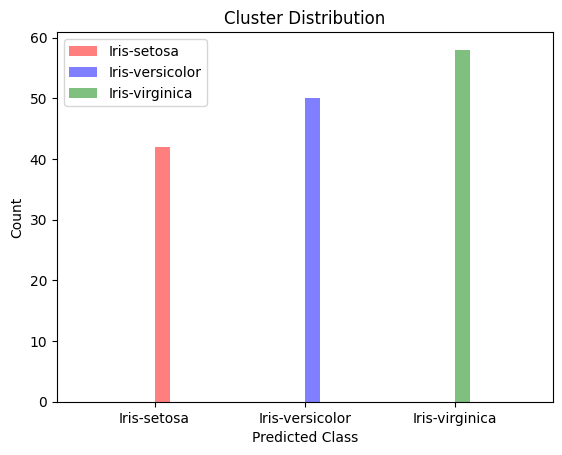

In [62]:
# Counting the number of samples in each predicted class
class_counts = iris_data['Predicted Class'].value_counts()

# Defining color mapping for each iris species
color_mapping = {
    'Iris-setosa': 'red',
    'Iris-versicolor': 'blue',
    'Iris-virginica': 'green'
}

# Plotting the histogram with different colors
plt.hist(iris_data[iris_data['Predicted Class'] == 'Iris-setosa']['Predicted Class'], color=color_mapping['Iris-setosa'], alpha=0.5, label='Iris-setosa')
plt.hist(iris_data[iris_data['Predicted Class'] == 'Iris-versicolor']['Predicted Class'], color=color_mapping['Iris-versicolor'], alpha=0.5, label='Iris-versicolor')
plt.hist(iris_data[iris_data['Predicted Class'] == 'Iris-virginica']['Predicted Class'], color=color_mapping['Iris-virginica'], alpha=0.5, label='Iris-virginica')

plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.title('Cluster Distribution')
plt.legend()
plt.show()

The histogram plot provides a visual representation of the cluster distribution for the Iris dataset. Each bar represents the count of samples in each predicted class (cluster). By using different colors for each iris species, we can observe the distribution of Iris-setosa, Iris-versicolor, and Iris-virginica within the clusters. From the histogram, we can infer the relative abundance of each iris species within the dataset. For example, if we see a higher count of samples in one particular cluster, it indicates a higher prevalence of that specific iris species in that cluster.

### **Step 8: Pair Plot**

A pair plot is a powerful visualization tool that allows us to see the relationships between different features and how they are distributed among the clusters.

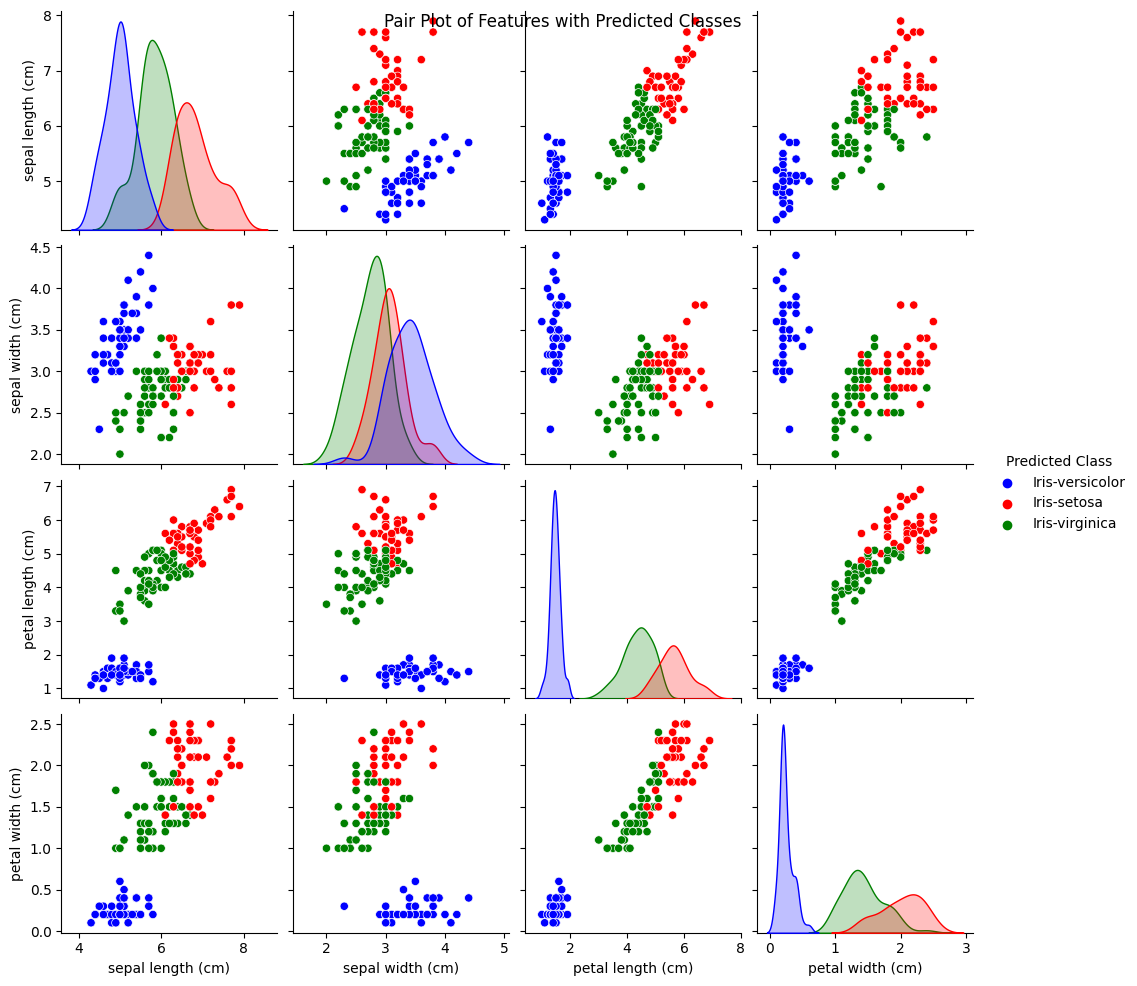

In [63]:
# Plotting the pair plot
import seaborn as sns
sns.pairplot(iris_data, hue='Predicted Class', palette=color_mapping)
plt.suptitle('Pair Plot of Features with Predicted Classes')
plt.show()

The pair plot allows us to visualize the relationships between different features (such as sepal length, sepal width, petal length, and petal width) in the Iris dataset, with each data point colored based on its predicted class (cluster). By using different colors for each iris species, we can observe how the features are distributed for each species and how well they separate into clusters. From the pair plot, we can gain insights into the similarities and differences between iris species and identify which features contribute the most to their differentiation. It also helps us understand the clustering results and validate their effectiveness.

### **Step 9: Tree Plot**

A tree plot is a graphical representation of a hierarchical structure. In the context of clustering, it can be used to visualize the hierarchical structure of the clusters.

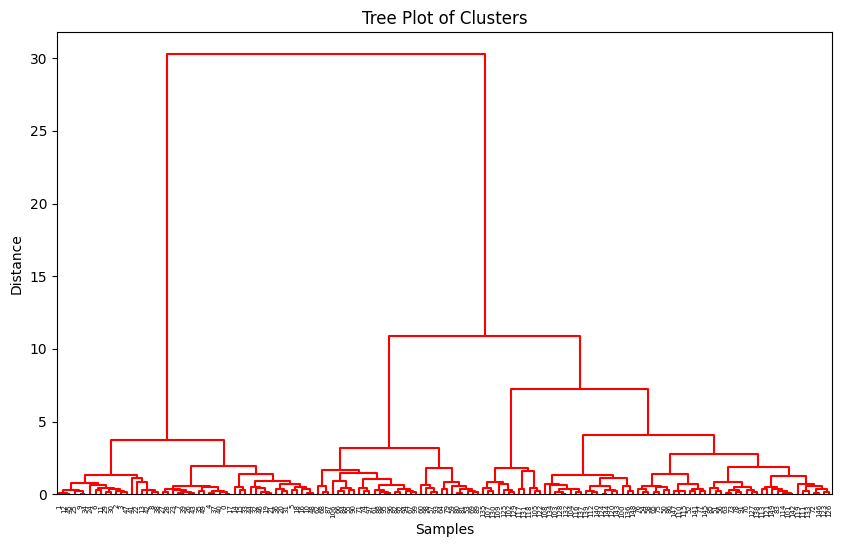

In [64]:
# Plotting the tree plot
from scipy.cluster import hierarchy
Z = hierarchy.linkage(iris_data.iloc[:, :-2], method='ward')
plt.figure(figsize=(10, 6))
dn = hierarchy.dendrogram(Z, color_threshold=0, above_threshold_color='red')
plt.title('Tree Plot of Clusters')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

The tree plot, also known as the dendrogram, provides a hierarchical representation of the clustering structure in the Iris dataset. Each leaf node represents a sample, and the vertical lines represent the distances between clusters. By using different colors for each iris species, we can observe how the samples from each species group together and form clusters. From the tree plot, we can gain insights into the relationships and similarities between different iris species. We can observe the formation of distinct clusters and the branches that join samples belonging to the same species. This visualization helps us understand the hierarchical structure of the clusters and the overall organization of the data.

## **CONCLUSION**

Based on the Elbow Method, we determined that the optimum number of clusters for the Iris dataset is 3. We used the KMeans algorithm to create a classifier with K=3 and visualized the clusters. We also added the predicted class labels to the dataset for comparison. Further, we visualized the cluster distribution using different plots.